In [1]:
import math

In [2]:
import pandas as pd

In [3]:
import pandas as pd

data = pd.read_csv('2023빅콘테스트_어드밴스드리그_예술의전당.csv', header=0, engine='python')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

In [5]:
data['performance_code'].nunique()

2931

# 멤버십 처리하기

In [6]:
# 멤버십 타입별 유니크 파악
unique_6 = data['membership_type_6'].unique()
print(unique_6)

[nan]


In [7]:
## 멤버십 타입1~6 열만 따오기, ## 멤버십 타입6 열 삭제
membership_df = data[['membership_type_1', 'membership_type_2', 'membership_type_3','membership_type_4','membership_type_5']]
membership_df

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5
0,골드,무료,그린,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,무료,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1920863,NaN,NaN,NaN,NaN,NaN
1920864,무료,싹틔우미,NaN,NaN,NaN
1920865,블루,무료,그린,NaN,NaN
1920866,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd 

pd.set_option('mode.chained_assignment',  None) # 경고 off

In [9]:
## MS 새로운 열 추가
membership_df['MS'] = 'm'
membership_df.head()

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS
0,골드,무료,그린,NaN,NaN,m
1,NaN,NaN,NaN,NaN,NaN,m
2,NaN,NaN,NaN,NaN,NaN,m
3,NaN,NaN,NaN,NaN,NaN,m
4,무료,NaN,NaN,NaN,NaN,m


In [10]:
## 타입1 = null -> n으로 변경
membership_df.loc[membership_df['membership_type_1'] != membership_df['membership_type_1'], 'membership_type_1'] = 'n'
membership_df

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS
0,골드,무료,그린,NaN,NaN,m
1,n,NaN,NaN,NaN,NaN,m
2,n,NaN,NaN,NaN,NaN,m
3,n,NaN,NaN,NaN,NaN,m
4,무료,NaN,NaN,NaN,NaN,m
...,...,...,...,...,...,...
1920863,n,NaN,NaN,NaN,NaN,m
1920864,무료,싹틔우미,NaN,NaN,NaN,m
1920865,블루,무료,그린,NaN,NaN,m
1920866,n,NaN,NaN,NaN,NaN,m


In [11]:
## n에 해당하는 행들의 MS열의 값을 0으로 변경
import numpy as np
membership_df['MS'] = np.where(membership_df['membership_type_1'] == 'n', 0, 'm')
membership_df

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS
0,골드,무료,그린,NaN,NaN,m
1,n,NaN,NaN,NaN,NaN,0
2,n,NaN,NaN,NaN,NaN,0
3,n,NaN,NaN,NaN,NaN,0
4,무료,NaN,NaN,NaN,NaN,m
...,...,...,...,...,...,...
1920863,n,NaN,NaN,NaN,NaN,0
1920864,무료,싹틔우미,NaN,NaN,NaN,m
1920865,블루,무료,그린,NaN,NaN,m
1920866,n,NaN,NaN,NaN,NaN,0


In [13]:
  #  One-hot encoding 처리

## 6열을 만들고 0 or 1 입력하기

## 각 6열 생성 
m_d = membership_df.copy()

m_d[['무료', '그린', '블루','골드','싹틔우미','노블']] = 0

## 표기하기

 # 블루 먼저
m_d['블루'] = np.where(m_d['membership_type_1'] == '블루', 1, 0)

 # 골드
m_d['골드'] = np.where(m_d['membership_type_1']== '골드', 1, 0)
m_d.loc[m_d['membership_type_2'] == '골드', '골드'] = 1
    #len(m_d.loc[m_d['골드'] == 1]) 
    
 # 무료
m_d['무료'] = np.where(m_d['membership_type_1']== '무료', 1, 0)
m_d.loc[m_d['membership_type_2'] == '무료', '무료'] = 1
m_d.loc[m_d['membership_type_3'] == '무료', '무료'] = 1

 # 노블
m_d['노블'] = np.where(m_d['membership_type_2']== '노블', 1, 0)
m_d.loc[m_d['membership_type_3'] == '노블', '노블'] = 1
m_d.loc[m_d['membership_type_4'] == '노블', '노블'] = 1
   #len(m_d.loc[m_d['노블'] == 1])

 # 싹틔우미
m_d['싹틔우미'] = np.where(m_d['membership_type_2']== '싹틔우미', 1, 0)
m_d.loc[m_d['membership_type_3'] == '싹틔우미', '싹틔우미'] = 1
m_d.loc[m_d['membership_type_4'] == '싹틔우미', '싹틔우미'] = 1
   
 #그린
m_d['그린'] = np.where(m_d['membership_type_2']== '그린', 1, 0)
m_d.loc[m_d['membership_type_3'] == '그린', '그린'] = 1
m_d.loc[m_d['membership_type_4'] == '그린', '그린'] = 1
m_d.loc[m_d['membership_type_5'] == '그린', '그린'] = 1

m_d

,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,MS,무료,그린,블루,골드,싹틔우미,노블
0,골드,무료,그린,NaN,NaN,m,1,1,0,1,0,0
1,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,무료,NaN,NaN,NaN,NaN,m,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1920864,무료,싹틔우미,NaN,NaN,NaN,m,1,0,0,0,1,0
1920865,블루,무료,그린,NaN,NaN,m,1,1,1,0,0,0
1920866,n,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [14]:
# csv 파일 저장
m_b_t = data.copy()
m_b_t[['MS','무료','그린','블루','골드','싹틔우미','노블']] = m_d[['MS','무료','그린','블루','골드','싹틔우미','노블']]
m_b_t

m_b_t.to_csv('각 멤버십 열 추가.csv')
m_d.to_csv('멤버십.csv')

In [15]:
### 좌석 알아내기
seat = data[['seat','place']]

seat

,seat,place
0,3층 BOX9 10,콘서트홀
1,1층 7열 5,리사이틀홀
2,1층 C블록 16열 3,IBK챔버홀
3,1층 2열 3,리사이틀홀
4,1층 B블록12열 7,콘서트홀
...,...,...
1920863,1층 A블록 14열 6,IBK챔버홀
1920864,3층 B블록5열 4,콘서트홀
1920865,1층 7열 3,리사이틀홀
1920866,1층 B블록 9열 5,IBK챔버홀


In [16]:
# place별로 분류

unique_place = seat['place'].unique()
print(unique_place)

['콘서트홀' '리사이틀홀' 'IBK챔버홀']


In [17]:
## 좌석등급 유추 2번째 방법

g_data = data[['performance_code','price','discount_type']]
g_data

,performance_code,price,discount_type
0,302,10000,일반
1,1120,0,초대권
2,2283,0,초대권
3,2798,0,초대권
4,897,180000,일반
...,...,...,...
1920863,1265,0,초대권
1920864,313,21000,청소년(만7세~만24세/본인만)30%
1920865,736,24000,그린회원 할인20%
1920866,1920,0,초대권


In [18]:
unique_discount= g_data['discount_type'].unique()
print(unique_discount)

['일반' '초대권' '블루회원 할인20%' '골드회원 할인20%' '기획사' 'K-lang 멤버십 회원(1인2매)20%'
 '기획사판매' '골드회원 할인30%' 'R석 기획사 할인' '싹틔우미 할인40%'
 '라흐마니노프탄생150주년(8매/3.27까지)20%' '공연진행석' '골드회원 할인10%' '장애인/국가유공자 할인50%'
 '싹딜가(골드)50%' '당일할인티켓' '그린회원 할인5%' '초,중,고,대학생(본인만)30%' '조기예매 할인40%'
 '그린회원 할인20%' '한화초대석' '단체100인이상50%' '공연예매권' '초/중/고등학생 할인(본인만)30%'
 '골드회원 할인15%' '골드회원 할인25%' '우리카드 우수회원' '조기예매 할인(1인8매/3월11일까지)30%' '신세계석'
 '골드회원 할인5%' '정기회원' '만65세 이상(본인만)50%' '싹딜가(블루)50%' '그린회원 할인15%'
 '직장인 할인(1인2매)20%' '블루회원 할인10%' '기획사판매20%' '초/중/고/대학생 할인(본인만)50%'
 '문화릴레이(1인2매/공연유료티켓제시)10%' '조기예매 할인10%' '노블회원 할인40%' 'K-Lang 할인(1인2매)20%'
 '골드회원 할인40%' '초/중/고등학생 할인(본인만)20%' '조기예매 할인(1인2매/~10월31일까지)30%' '기업석'
 '초/중/고/대학생 할인30%' '초/중/고/대학생 할인50%' '의사상자(동반1인/신분증지참)50%'
 '초,중,고,대학생(본인만)50%' '조기예매할인(1인8매/~6.30까지)30%' '그린회원 할인10%' '블루회원 할인5%'
 '연주자 할인50%' '스탭 할인30%' '홍보진행' 'KOSYMI  유료회원(1인4매)40%'
 '청소년(만7세~만24세/본인만)50%' '청소년(만 24세 이하/본인만)30%' '단체20인이상20%'
 '얼리버드 할인(1인4매/10월31일까지)10%' '패밀리할인(3매이상/1인4매)15%' '싹딜가(그린)60%' 'KT석'
 '조기예매 할인(1인8매/9

In [19]:
## 퍼센트 유무 열 만들기
g_data['per'] = 0

 # 퍼센트 포함된 값 분류
gg_data=g_data.copy()
g_data[g_data['discount_type'].str.contains('%')]
gg_data['per'] = np.where(g_data['discount_type'].str.contains('%'), 1, 0)
gg_data
#gg_data = g_data.loc[g_data['discount_type'].str.contains('%'),'per'] = 1
#gg_data

,performance_code,price,discount_type,per
0,302,10000,일반,0
1,1120,0,초대권,0
2,2283,0,초대권,0
3,2798,0,초대권,0
4,897,180000,일반,0
...,...,...,...,...
1920863,1265,0,초대권,0
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1
1920865,736,24000,그린회원 할인20%,1
1920866,1920,0,초대권,0


In [20]:
## 퍼센트 숫자만 뽑기
gg_data['perc1'] = 0
gg_data['perc1'] = gg_data['discount_type'].str.extract(r'(\d+%)')

gg_data['perc']=0
gg_data['perc'] = gg_data['perc1'].str.extract(r'(\d+)')

gg_data = gg_data.drop(columns=['perc1'])

gg_data
#a = gg_data['perc'].unique()
#print(a)

,performance_code,price,discount_type,per,perc
0,302,10000,일반,0,NaN
1,1120,0,초대권,0,NaN
2,2283,0,초대권,0,NaN
3,2798,0,초대권,0,NaN
4,897,180000,일반,0,NaN
...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30
1920865,736,24000,그린회원 할인20%,1,20
1920866,1920,0,초대권,0,NaN


In [21]:
gg_data

,performance_code,price,discount_type,per,perc
0,302,10000,일반,0,NaN
1,1120,0,초대권,0,NaN
2,2283,0,초대권,0,NaN
3,2798,0,초대권,0,NaN
4,897,180000,일반,0,NaN
...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30
1920865,736,24000,그린회원 할인20%,1,20
1920866,1920,0,초대권,0,NaN


In [22]:
## 원래값 계산

# 원래값 열 만들기
ggg_data = gg_data.copy()
ggg_data

,performance_code,price,discount_type,per,perc
0,302,10000,일반,0,NaN
1,1120,0,초대권,0,NaN
2,2283,0,초대권,0,NaN
3,2798,0,초대권,0,NaN
4,897,180000,일반,0,NaN
...,...,...,...,...,...
1920863,1265,0,초대권,0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30
1920865,736,24000,그린회원 할인20%,1,20
1920866,1920,0,초대권,0,NaN


In [23]:
# nan = 0 
ggg_data['perc'] = ggg_data['perc'].fillna(0)

# 원가 구하는 함수
ggg_data['perc'] = ggg_data['perc'].astype(int)
ggg_data['discount_rate'] = ggg_data['perc'] / 100

# 'original_price' 열을 만들고 값을 계산하여 넣어줌
ggg_data['original_price'] = ggg_data.apply(lambda row: row['price'] if row['per'] == 0 else row['price'] / (1 - row['discount_rate']), axis=1)


# L 열 삭제
#ggg_data = ggg_data.drop(columns=['per'])

import numpy as np

# 'per' 열이 0인 행들의 'original_price'을 결측치로 바꿈
ggg_data.loc[ggg_data['per'] == 0, 'original_price'] = np.nan

ggg_data

,performance_code,price,discount_type,per,perc,discount_rate,original_price
0,302,10000,일반,0,0,0.0,NaN
1,1120,0,초대권,0,0,0.0,NaN
2,2283,0,초대권,0,0,0.0,NaN
3,2798,0,초대권,0,0,0.0,NaN
4,897,180000,일반,0,0,0.0,NaN
...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,0,0.0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30,0.3,30000.0
1920865,736,24000,그린회원 할인20%,1,20,0.2,30000.0
1920866,1920,0,초대권,0,0,0.0,NaN


In [24]:
# 일반 타입인 애들 = 가격 그대로
ggg_data.loc[ggg_data['discount_type'] == '일반', 'original_price'] = ggg_data['price']


In [25]:
# 'original_price'을 천원 단위로 바꾸기
import numpy as np

#ggg_data['original_price'] = np.ceil(ggg_data['original_price'] / 1000) * 1000


#ggg_data['original_price'] = np.round(ggg_data['original_price'] / 1000) * 1000


# 'original_price' 열의 값을 오천 단위로 올림
ggg_data['original_price'] = np.ceil(ggg_data['original_price'] / 5000) * 5000


In [26]:
unique_original_prices = sorted(ggg_data['original_price'].unique())
print(unique_original_prices)


[10000.0, nan, 0.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0, 55000.0, 60000.0, 65000.0, 70000.0, 75000.0, 80000.0, 85000.0, 90000.0, 95000.0, 100000.0, 105000.0, 110000.0, 120000.0, 125000.0, 130000.0, 135000.0, 140000.0, 150000.0, 160000.0, 170000.0, 180000.0, 190000.0, 200000.0, 210000.0, 220000.0, 230000.0, 235000.0, 250000.0, 255000.0, 260000.0, 265000.0, 280000.0, 290000.0, 300000.0, 320000.0, 330000.0, 340000.0, 350000.0, 380000.0, 390000.0, 400000.0, 430000.0, 480000.0, 485000.0]


# ggg_data23 ==> 0원이랑 결측값 뺌

In [28]:
## 0값 빼고 백분위표

ggg_data23 = ggg_data.copy()

In [29]:

ggg_data23 = ggg_data23[~((ggg_data23['original_price'] == 0) | (ggg_data23['original_price'].isna()))]


In [30]:
import numpy as np

# 'original_price' 열의 백분위수 계산
percentiles = np.percentile(ggg_data23['original_price'], [25, 50, 75])

print(f'25% 백분위수: {percentiles[0]}')
print(f'중앙값 (50% 백분위수): {percentiles[1]}')
print(f'75% 백분위수: {percentiles[2]}')


25% 백분위수: 30000.0
중앙값 (50% 백분위수): 50000.0
75% 백분위수: 90000.0


In [31]:
import numpy as np

# 상위 90% 백분위수 계산
top_percentile = np.percentile(ggg_data23['original_price'], 90)

print(f'상위 90% 백분위수: {top_percentile}')


상위 90% 백분위수: 130000.0


In [32]:
import numpy as np

# 상위 90% 백분위수 계산
top_percentile = np.percentile(ggg_data23['original_price'], 98)

print(f'상위 98% 백분위수: {top_percentile}')

상위 98% 백분위수: 260000.0


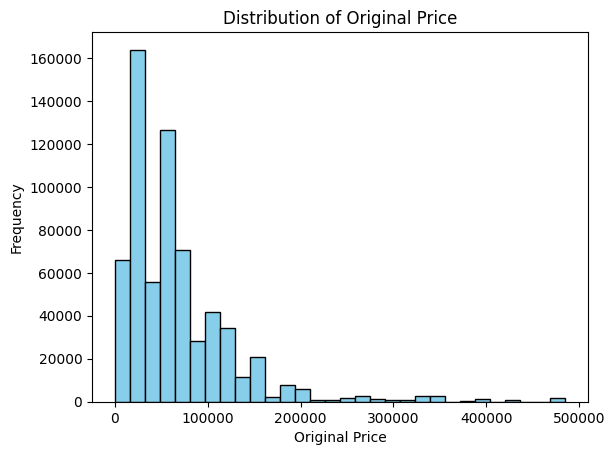

In [33]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.hist(ggg_data['original_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original Price')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 누적 분포 함수 (ECDF) 정의
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# 'original_price' 데이터 추출
original_price_data = ggg_data['original_price'].dropna()

# ECDF 계산
x, y = ecdf(original_price_data)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Original Price')
plt.ylabel('ECDF (%)')
plt.title('Empirical Cumulative Distribution Function of Original Price')
plt.grid(True)
plt.show()

In [34]:
ggg_data

,performance_code,price,discount_type,per,perc,discount_rate,original_price
0,302,10000,일반,0,0,0.0,10000.0
1,1120,0,초대권,0,0,0.0,NaN
2,2283,0,초대권,0,0,0.0,NaN
3,2798,0,초대권,0,0,0.0,NaN
4,897,180000,일반,0,0,0.0,180000.0
...,...,...,...,...,...,...,...
1920863,1265,0,초대권,0,0,0.0,NaN
1920864,313,21000,청소년(만7세~만24세/본인만)30%,1,30,0.3,35000.0
1920865,736,24000,그린회원 할인20%,1,20,0.2,30000.0
1920866,1920,0,초대권,0,0,0.0,NaN


# 0원 포함 버전 올리기  # 스케일링&원가 합치기 / 나이성별 버리기
# 20000 넘는 애들 버리기

In [38]:
fin23 = ggg_data.copy()
fin23[fin23['original_price'] > 200000]

fin23 = fin23.drop(fin23[fin23['original_price'] > 200000].index)
fin23

fin_og = pd.DataFrame({'original_price': fin23['original_price']})
fin_og

,original_price
0,10000.0
1,NaN
2,NaN
3,NaN
4,180000.0
...,...
1920863,NaN
1920864,35000.0
1920865,30000.0
1920866,NaN


In [39]:
# 결측값 => 0원 처리
fin_og['original_price'].fillna(0, inplace=True)
fin_og['original_price'].unique()

array([ 10000.,      0., 180000.,  70000.,  75000.,  30000.,  20000.,
       120000., 130000.,  65000., 110000.,  90000.,  50000.,  40000.,
       100000.,  35000., 150000., 125000.,  60000.,  80000.,  55000.,
        45000., 200000.,  15000., 160000., 170000., 190000., 140000.,
       135000.,  85000.,  25000.,  95000., 105000.])

In [40]:
## 가져오기 

d23= pd.read_csv('Final_KNN.csv', header=0, engine='python')

In [41]:
dd23= d23.copy()

In [42]:
## 나이성별원가 빼기
dd23 = dd23.drop(columns=['age', 'gender','original_price'])

dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1


In [43]:
# fin_og['original_price']를 붙이기
dd23['original_price'] = fin_og['original_price']
dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1,10000.0
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6,0.0
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0,0.0
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0,0.0
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1,180000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0,0.0
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0,35000.0
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3,30000.0
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1,0.0


In [44]:
##  original_price 결측값인 행들 빼기
dd23[dd23['original_price'].isnull()]

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
58,2,1,0.666667,1,1,0,0,0,0,3,2,2,0.000000,2,0.555556,7,0.172414,0,0,NaN
298,2,1,0.500000,1,1,0,0,1,0,3,2,2,0.014006,3,0.518519,3,0.172414,0,0,NaN
566,2,1,0.666667,1,1,1,1,0,0,1,3,2,0.148459,2,0.518519,3,0.172414,0,0,NaN
1018,2,1,0.500000,1,0,0,0,1,0,2,3,2,0.033613,4,0.555556,4,0.172414,0,0,NaN
1064,0,1,0.000000,1,0,0,1,0,0,3,3,2,0.280112,2,0.370370,5,0.137931,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920068,0,1,0.000000,1,0,1,1,0,1,1,3,2,0.070028,3,0.555556,2,0.206897,0,0,NaN
1920368,0,1,0.666667,1,1,0,0,0,0,3,2,2,0.000000,6,0.555556,7,0.172414,0,0,NaN
1920398,2,1,0.500000,1,0,0,1,0,0,2,3,2,0.033613,2,0.555556,4,0.172414,0,0,NaN
1920456,0,1,0.000000,1,0,0,0,1,0,3,3,2,0.072829,3,0.555556,3,0.206897,0,0,NaN


In [45]:
#드롭
dd23 = dd23.dropna(subset=['original_price'])
dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1,10000.0
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6,0.0
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0,0.0
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0,0.0
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1,180000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0,0.0
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0,35000.0
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3,30000.0
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1,0.0


In [46]:
# 스케일링

# 스케일링
from sklearn.preprocessing import MinMaxScaler

# 스케일러 생성
scaler = MinMaxScaler()

# 스케일링할 열 선택
columns_to_scale = ['original_price']

# 선택한 열에 대해 스케일링 수행
dd23[columns_to_scale] = scaler.fit_transform(dd23[columns_to_scale])


In [47]:
dd23

,ticket_cancel,place,intermission,무료,그린,블루,골드,싹틔우미,노블,seat_Token,time_category,encoded_genre,date_difference,tokenized_discount,discount_type_count,day_of_week,running_time,is_holiday,corona_reg,original_price
0,2,1,0.5,1,1,0,1,0,0,4,3,2,0.000000,4,0.407407,5,0.206897,0,1,0.050
1,0,2,0.5,0,0,0,0,0,0,3,3,4,0.019608,1,0.185185,6,0.103448,1,6,0.000
2,0,3,0.5,0,0,0,0,0,0,1,3,4,0.042017,1,0.407407,6,0.068966,0,0,0.000
3,0,2,0.5,0,0,0,0,0,0,3,3,4,0.000000,1,0.222222,3,0.103448,0,0,0.000
4,0,1,0.0,1,0,0,0,0,0,1,3,4,0.030812,4,0.296296,3,0.103448,0,1,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920863,0,3,0.5,0,0,0,0,0,0,1,2,8,0.000000,1,0.222222,6,0.137931,0,0,0.000
1920864,0,1,0.0,1,0,0,0,1,0,4,2,2,0.184874,2,0.481481,6,0.206897,0,0,0.175
1920865,0,2,0.5,1,1,1,0,0,0,3,3,4,0.019608,2,0.259259,6,0.137931,0,3,0.150
1920866,0,3,0.5,0,0,0,0,0,0,1,3,4,0.000000,1,0.444444,6,0.103448,0,1,0.000


In [48]:
dd23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1902433 entries, 0 to 1920867
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ticket_cancel        int64  
 1   place                int64  
 2   intermission         float64
 3   무료                   int64  
 4   그린                   int64  
 5   블루                   int64  
 6   골드                   int64  
 7   싹틔우미                 int64  
 8   노블                   int64  
 9   seat_Token           int64  
 10  time_category        int64  
 11  encoded_genre        int64  
 12  date_difference      float64
 13  tokenized_discount   int64  
 14  discount_type_count  float64
 15  day_of_week          int64  
 16  running_time         float64
 17  is_holiday           int64  
 18  corona_reg           int64  
 19  original_price       float64
dtypes: float64(5), int64(15)
memory usage: 304.8 MB


In [50]:
# 저장본
dd23.to_csv("최종본_스케일링.csv", index=False)

In [ ]:
dd23['original_price'].nunique() # 가격 종류 => 33가지

In [ ]:
# 200000 넘는 애들 몇명   18435개
ggg_data[ggg_data['original_price'] > 200000]

In [ ]:
## 200000넘는 애들 날리기   잔여 : 1902433개 
dae= ggg_data.copy()
dae = dae.drop(dae[dae['original_price'] > 200000].index)
dae

In [ ]:
count_price_over_300000 = len(ggg_data[ggg_data['original_price'] > 200000])  # 18435 행
print(count_price_over_300000)

In [ ]:
ggg_data['original_price'].to_csv('원가행 최종(결측치 표시).csv')

In [ ]:
ggg_data[ggg_data['original_price'] == 1000]

In [ ]:
## 좌석 등급 유추하기

# 초대권 or 0원 버리고 & 타입 = 일반
s_d = ggg_data.copy()

s_d = ggg_data[['performance_code','original_price']]
s_d['discount_type'] = ggg_data['discount_type']

s_d = s_d[s_d['discount_type'] == '일반']
s_d= s_d[s_d['original_price'] != 0]

s_d

In [ ]:
## 퍼모먼스 코드별로 묶고 가격순으로 정렬

s_dd = s_d.copy()
s_dd = s_d.sort_values(by=['performance_code','original_price'], ascending=True)

s_dd['grade'] = 0
s_dd['gr_uni'] = s_dd.groupby('performance_code')['original_price'].transform('nunique')


s_dd

In [ ]:
## 가격 종류 5개 이상인 퍼포먼스 코드 개수

# 해당 퍼모먼스 코드 고유값   2811 => / 가격 종류 개수 -> 1~8개
s_dd.nunique()
s_dd.count()


In [ ]:
## 5개 이상인 것만 남기고
s_ddd = s_dd.copy()

s_ddd = s_ddd[s_ddd['gr_uni'] < 5]
s_ddd

## 퍼포먼스 고유값 개수 구하기  -> 156개 / 236954

s_ddd['performance_code'].unique()   # 5개 이상인 퍼포먼스코드 목록
s_ddd['performance_code'].nunique()   # 고유값 개수

In [ ]:
s_dd

## 가격 종류 개수 = 1

In [ ]:
## 좌석 등급 매기기 s_dd

 # s_dd['gr_uni'] = 1개 
s_dd[s_dd['gr_uni'] ==1]
s_dd.loc[s_dd['gr_uni'] == 1 , 'grade'] = '전체 일반석'

   # 퍼포먼스 고유값 개수 => 1520 개 / 2811
unique_performance_count1 = s_dd[s_dd['gr_uni'] == 1]['performance_code'].nunique()

print(unique_performance_count1)
# s_dd 


## 가격 종류 개수 = 2

In [ ]:
# s_dd['gr_uni'] = 2개 -> 2가지 좌석 등급 -> R- 5만원 S- 3만원 (홈페이지 참고)
    
s_dd[s_dd['gr_uni'] ==2]
#s_ddd = s_dd[s_dd['gr_uni'] ==2]

    # 'gr_uni' 값이 2인 행들에 대해서만 'grade' 값을 변경
    
# 'performance_code' 별 최대 'original_price' 값 계산
max_prices = s_dd.groupby('performance_code')['original_price'].transform('max')

# 조건에 따라 'grade' 값을 변경
condition = (s_dd['gr_uni'] == 2) & (s_dd['original_price'] == max_prices)
s_dd.loc[condition, 'grade'] = 'R'
s_dd.loc[condition, 'grade'] = s_dd.loc[condition].apply(lambda row: 'R' if row['original_price'] == max_prices[s_dd['performance_code'] == row['performance_code']].values[0] else 'A', axis=1)
    

#s_ddd['original_price'].unique()

   # = 2 퍼포먼스 고유값 개수 
#unique_performance_count3 = s_dd[s_dd['gr_uni'] == 2]['performance_code'].nunique()

#print(unique_performance_count2)

s_dd 

#s_dd['grade'].unique()
#s_dd[s_dd['performance_code'] ==8]      # 테스트

In [ ]:
s_dd.info()

## 가격 종류 개수 = 3 처리

In [ ]:
# s_dd['gr_uni'] = 3개    -> 350개

   # 천원 단위인 애들 = 할인 -> 정규화로 분류

    # 등급 새겨주기
filtered_rows = s_dd[s_dd['gr_uni'] == 3].copy()

def change_grade(group):
    if len(group) == 1:
        group['grade'] = 'A'
    else:
        sorted_rows = group.sort_values(by='original_price', ascending=False)
        max_grade_idx = sorted_rows['original_price'].idxmax()
        sorted_rows['grade'] = 'A'
        sorted_rows.at[max_grade_idx, 'grade'] = 'R'
        
        if len(sorted_rows) >= 2:
            second_max_grade_idx = sorted_rows['original_price'].nlargest(2).idxmin()
            sorted_rows.at[second_max_grade_idx, 'grade'] = 'S'
            
            # 중복된 original_price를 가지는 행들에 대한 처리
            same_price_rows = sorted_rows[sorted_rows['original_price'] == sorted_rows.at[second_max_grade_idx, 'original_price']]
            same_price_rows['grade'] = 'S'
            sorted_rows.update(same_price_rows)
        
    return sorted_rows

filtered_rows = filtered_rows.groupby('performance_code', group_keys=False).apply(change_grade)

s_dd.update(filtered_rows)

s_dd

#unique_performance_codes = s_dd[s_dd['gr_uni'] == 3]['original_price'].unique()
#unique_performance_codes3 = s_dd[s_dd['gr_uni'] == 3]['performance_code'].unique()
#print(unique_performance_codes3)

s_dd
#테스트
s_dd[s_dd['performance_code'] ==50] 


# 가격 종류 = 4 처리

In [ ]:
## 종류 = 4 -> 정규화 파악
unique_o_p = s_dd[s_dd['gr_uni'] == 4]['original_price'].unique()
print(unique_o_p)
unique_performance_codes4 = s_dd[s_dd['gr_uni'] == 4]['performance_code'].unique()
#print(unique_performance_codes4)

s_dd[s_dd['performance_code'] ==303]['original_price'].unique()

In [ ]:
s_dd
s_dd.isnull().sum()

In [ ]:
sorted_rows = s_dd[s_dd['gr_uni'] == 4].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows
sorted_rows.to_csv('sorted_rows.csv')

unique_o_p = s_dd[s_dd['gr_uni'] == 4]['original_price'].unique()
unique_o_p_sorted = sorted(unique_o_p)
print(unique_o_p_sorted)

## 가격 종류 개수 = 4 수작업 과정

In [ ]:
### 의심되는 가격이 포함된 퍼포먼스 번호 → 따로 수작업 처리
    ## 1. 하나씩 확인하고 할인 영향으로 특이값처럼 보이면 따로 범주화 작업 / 2. 원가 자체가 애매했던거라면 공통작업

 ## 33000원  -> 441 , 873 , 876, 880, 1199, 1231, 1232 -> 수작업 x

 ## 44000원 -> 718, 2604 -> 수작업 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 44000)]['performance_code'].unique()
performance_codes_sorted44 = sorted(performance_codes)
#print(performance_codes_sorted44)

 ## 55000 -> 219, 441, 718, 873, 876, 880, 881, 893, 996, 1199, 1231, 1232, 1400, 1546, 1715, 1716 -> 수작업 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 55000)]['performance_code'].unique()
performance_codes_sorted55 = sorted(performance_codes)
#print(performance_codes_sorted55)

 ## 66000 -> 2604, 2615, 2616 -> 수작업 처리 해줌 -> 완료
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 66000)]['performance_code'].unique()
performance_codes_sorted66 = sorted(performance_codes)
#print(performance_codes_sorted66)

  # 2604 -> 44000 = A 66000,99000 = S 133000 = R
conditions = [
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 2604) & (s_dd['original_price'] == 44000),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 2604) & (s_dd['original_price'].isin([66000, 99000])),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 2604) & (s_dd['original_price'] == 133000)
]

choices = ['A', 'S', 'R']

s_dd['grade'] = np.select(conditions, choices, default=s_dd['grade'])

s_dd

  # 2615,2616  -> 66000원 = A , 88000 = S , 110000&121000 = R
condition = (s_dd['gr_uni'] == 4) & (s_dd['performance_code'].isin([2615, 2616])) & (s_dd['original_price'].isin([66000, 88000, 110000, 121000]))
selected_rows = s_dd[condition].index

s_dd.loc[selected_rows, 'grade'] = s_dd.loc[selected_rows, 'original_price'].astype(int).apply(
    lambda x: 'A' if x == 66000 else ('R' if x in [110000, 121000] else ('S' if x == 88000 else s_dd.loc[selected_rows, 'grade'])))    
    
 ## 75000 -> 1234 -> 50000 = A , 75000 ,100000 = S , 150000 = R -> 처리 완료
conditions = [
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 50000),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'].isin([75000, 100000])),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 150000)
]

choices = ['A', 'S', 'R']

s_dd['grade'] = np.select(conditions, choices, default=s_dd['grade'])

 ## 77000  -> 수 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 77000)]['performance_code'].unique()
performance_codes_sorted77 = sorted(performance_codes)
#print(performance_codes_sorted77)

 ## 88000 -> 1231, 1232, 2615, 2616] -> 수 x
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 88000)]['performance_code'].unique()
performance_codes_sorted88 = sorted(performance_codes)
#print(performance_codes_sorted88)    
    
 ## 99000 -> 수 X
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 99000)]['performance_code'].unique()
performance_codes_sorted99 = sorted(performance_codes)
#print(performance_codes_sorted99)  

 ## 132000 -> [876, 1192] -> 수 X
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 132000)]['performance_code'].unique()
performance_codes_sorted99 = sorted(performance_codes)
#print(performance_codes_sorted99)  
    
    
 ## 133000 -> 2604 -> 수작업 -> 1234 -> 44000 = A , 66000 ,99000 = S , 133000 = R -> 
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 133000)]['performance_code'].unique()
performance_codes_sorted133 = sorted(performance_codes)
#print(performance_codes_sorted133) 
conditions = [
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 44000),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'].isin([66000, 99000])),
    (s_dd['gr_uni'] == 4) & (s_dd['performance_code'] == 1234) & (s_dd['original_price'] == 133000)
]

choices = ['A', 'S', 'R']

s_dd['grade'] = np.select(conditions, choices, default=s_dd['grade'])

 ## 170000 -> [646, 1241, 2297, 2298, 2598] => 수 X
performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 170000)]['performance_code'].unique()
performance_codes_sorted133 = sorted(performance_codes)
#print(performance_codes_sorted133) 

     

In [ ]:
#테스트
s_dd[s_dd['performance_code'] ==2604] # 해당 퍼포먼스 값들의 행 보기
s_dd[s_dd['performance_code'] == 2615]['original_price'].unique() # 해당 퍼포먼스 값들의 가격 종류 보기
s_dd[s_dd['performance_code'] == 2604]['grade'].unique()   # 해당 퍼포먼스 값들의 좌석 등급 종류 보기
#selected_rows = s_dd[condition]
#print(selected_rows)
#performance_codes = s_dd[(s_dd['gr_uni'] == 4) & (s_dd['original_price'] == 75000)]['performance_code'].unique()    
#print(performance_codes) 

In [ ]:
s_dd

s_dd.to_csv('가격 유니크 =4 수작업 파트까지 완료본.csv')

## 가격 종류 개수 = 4   함수 -> RSAB타입 좌석 등급 처리 

In [ ]:
## 가격 4종류인 애들 달아주기

# gr_uni = 4 이면서 grade = 0 인 행들중에 같은 퍼포먼스 코드 그룹 안에서 'original_price' 크기 순서대로 'grade' = RSAB 돌리기

condition = (s_dd['gr_uni'] == 4) & (s_dd['grade'] == 0)
filtered_rows = s_dd[condition]

# 그룹 내에서 'original_price'를 기준으로 정렬하고 'grade'값을 변경하는 함수를 정의합니다.
def assign_grade(group):
    grades = ['R', 'S', 'A', 'B']
    unique_prices = sorted(group['original_price'].unique(), reverse=True)
    grade_mapping = {price: grade for price, grade in zip(unique_prices, grades)}
    group['grade'] = group['original_price'].map(grade_mapping)
    return group


result_df = s_dd.groupby('performance_code', group_keys=False).apply(assign_grade)

# 변경된 'grade'값을 원본 데이터프레임에 업데이트합니다.
s_dd.update(result_df)

s_dd

In [ ]:
# 테스트
s_dd[s_dd['performance_code'] ==2938]

# 가격 종류 개수 = 5~8 수작업 좌석등급 처리

## 가격 종류 개수 = 5

In [ ]:
unique_performance_codes58 = s_dd[s_dd['gr_uni'] >=5]['performance_code'].nunique()
print(unique_performance_codes58)
nunique_performance_codes58 = s_dd[s_dd['gr_uni'] >=5]
print(nunique_performance_codes58)

# 퍼포먼스 = 156개

# 5 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 5].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows
sorted_rows.to_csv('sorted_rows5.csv')


In [ ]:
#### gr_uni = 5  => 138개 
unique_performance_codes5 = s_dd[s_dd['gr_uni'] == 5]['performance_code'].unique()
#print(unique_performance_codes5)

# RSABC 등급 부여
condition = (s_dd['gr_uni'] == 5) & (s_dd['grade'] == 0)
s_dd.loc[condition, 'grade'] = 'C'

print(s_dd)
## 결측값 확인
condition = (s_dd['gr_uni'] == 5) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
#print(count)

## 가격 종류 개수 = 6

In [ ]:
# 6 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 6].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows
sorted_rows.to_csv('sorted_rows6.csv')


In [ ]:
### gr_uni = 6 => 10개  -> 81  298  299  300  318  319  320  989 1415 1416
unique_performance_codes6 = s_dd[s_dd['gr_uni'] == 6]['performance_code'].unique()
#print(unique_performance_codes6)


  ## 수작업 처리
    
# 81
condition_1 = (s_dd['performance_code'] == 81) & (s_dd['original_price'] == 10000)
condition_2 = (s_dd['performance_code'] == 81) & (s_dd['original_price'] == 20000)

s_dd.loc[condition_1, 'grade'] = 'C'
s_dd.loc[condition_2, 'grade'] = 'B'

#298
condition_3 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 10000)
condition_4 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 35000)
condition_5 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 50000)
condition_6 = (s_dd['performance_code'] == 298) & (s_dd['original_price'] == 84000)

s_dd.loc[condition_3, 'grade'] = 'C'
s_dd.loc[condition_4, 'grade'] = 'B'
s_dd.loc[condition_5, 'grade'] = 'A'
s_dd.loc[condition_6, 'grade'] = 'S'

#299
condition_7 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 10000)
condition_8 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 35000)
condition_9 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 50000)
condition_10 = (s_dd['performance_code'] == 299) & (s_dd['original_price'] == 63000)

s_dd.loc[condition_7, 'grade'] = 'B'
s_dd.loc[condition_8, 'grade'] = 'A'
s_dd.loc[condition_9, 'grade'] = 'A'
s_dd.loc[condition_10, 'grade'] = 'S'

#300   -> 10 7 4.9 4 2.8 1
condition_11 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 10000)
condition_12 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 28000)
condition_13 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 49000)
condition_14 = (s_dd['performance_code'] == 300) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_13, 'grade'] = 'S'
s_dd.loc[condition_12, 'grade'] = 'A'
s_dd.loc[condition_14, 'grade'] = 'A'
s_dd.loc[condition_11, 'grade'] = 'B'

# 318  1 3 5 6 9 12
condition_15 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 60000)
condition_16 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 50000)
condition_17 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 30000)
condition_18 = (s_dd['performance_code'] == 318) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_15, 'grade'] = 'S'
s_dd.loc[condition_16, 'grade'] = 'A'
s_dd.loc[condition_17, 'grade'] = 'B'
s_dd.loc[condition_18, 'grade'] = 'C'

#319  1 3 5 7 9 10
condition_19 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 70000)
condition_20 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 50000)
condition_21 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 30000)
condition_22 = (s_dd['performance_code'] == 319) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_19, 'grade'] = 'R'
s_dd.loc[condition_20, 'grade'] = 'A'
s_dd.loc[condition_21, 'grade'] = 'B'
s_dd.loc[condition_22, 'grade'] = 'C'

#320  1 3 5 6 9 12
condition_23 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 60000)
condition_24 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 50000)
condition_25 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 30000)
condition_26 = (s_dd['performance_code'] == 320) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_23, 'grade'] = 'S'
s_dd.loc[condition_24, 'grade'] = 'A'
s_dd.loc[condition_25, 'grade'] = 'B'
s_dd.loc[condition_26, 'grade'] = 'C'

#989 1.4 2 5 6.3 
condition_27 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 63000)
condition_28 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 50000)
condition_29 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 20000)
condition_30 = (s_dd['performance_code'] == 989) & (s_dd['original_price'] == 14000)

s_dd.loc[condition_27, 'grade'] = 'S'
s_dd.loc[condition_28, 'grade'] = 'A'
s_dd.loc[condition_29, 'grade'] = 'B'
s_dd.loc[condition_30, 'grade'] = 'C'

#1415   4 7 7.6 9 9.3
condition_31 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 93000)
condition_32 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 90000)
condition_33 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 76000)
condition_34 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 70000)
condition_35 = (s_dd['performance_code'] == 1415) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_31, 'grade'] = 'R'
s_dd.loc[condition_32, 'grade'] = 'S'
s_dd.loc[condition_33, 'grade'] = 'S'
s_dd.loc[condition_34, 'grade'] = 'A'
s_dd.loc[condition_35, 'grade'] = 'B'

#1416     4 7 7.6 9 9.3
condition_36 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 93000)
condition_37 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 90000)
condition_38 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 76000)
condition_39 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 70000)
condition_40 = (s_dd['performance_code'] == 1416) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_36, 'grade'] = 'R'
s_dd.loc[condition_37, 'grade'] = 'S'
s_dd.loc[condition_38, 'grade'] = 'S'
s_dd.loc[condition_39, 'grade'] = 'A'
s_dd.loc[condition_40, 'grade'] = 'B'



## 결측값 확인
condition = (s_dd['gr_uni'] == 6) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
print(count)

# 퍼포먼스 코드 테스트
#s_dd[s_dd['performance_code'] ==989]
s_dd

## 가격 종류 개수 = 7

In [ ]:
# 7 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 7].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows
sorted_rows.to_csv('sorted_rows7.csv')

In [ ]:
### gr_uni = 7 => 5개   [301 315 317 938 988]
unique_performance_codes7 = s_dd[s_dd['gr_uni'] == 7]['performance_code'].unique()
#print(unique_performance_codes7)


# 301   b1   a3.5  a 5   s 6.3   r 8.4  s 9  12

condition_41 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 90000)
condition_42 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 84000)
condition_43 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 63000)
condition_44 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 50000)
condition_45 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 35000)
condition_46 = (s_dd['performance_code'] == 301) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_41, 'grade'] = 'S'
s_dd.loc[condition_42, 'grade'] = 'R'
s_dd.loc[condition_43, 'grade'] = 'S'
s_dd.loc[condition_44, 'grade'] = 'A'
s_dd.loc[condition_45, 'grade'] = 'A'
s_dd.loc[condition_46, 'grade'] = 'B'

#315   c  1   1.5  b3  r 4.5 
condition_47 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 45000)
condition_48 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 30000)
condition_49 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 15000)
condition_50 = (s_dd['performance_code'] == 315) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_47, 'grade'] = 'R'
s_dd.loc[condition_48, 'grade'] = 'B'
s_dd.loc[condition_49, 'grade'] = 'B'
s_dd.loc[condition_50, 'grade'] = 'C'



#317     C 1 B 3 4 5 

condition_51 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 50000)
condition_52 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 40000)
condition_53 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 30000)
condition_54 = (s_dd['performance_code'] == 317) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_51, 'grade'] = 'R'
s_dd.loc[condition_52, 'grade'] = 'B'
s_dd.loc[condition_53, 'grade'] = 'B'
s_dd.loc[condition_54, 'grade'] = 'C'


#938   C2 B 3 A 5 S 8 9 R 10 
condition_55 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 100000)
condition_56 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 90000)
condition_57 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 80000)
condition_58 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 50000)
condition_59 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 30000)
condition_60 = (s_dd['performance_code'] == 938) & (s_dd['original_price'] == 20000)

s_dd.loc[condition_55, 'grade'] = 'R'
s_dd.loc[condition_56, 'grade'] = 'S'
s_dd.loc[condition_57, 'grade'] = 'S'
s_dd.loc[condition_58, 'grade'] = 'A'
s_dd.loc[condition_59, 'grade'] = 'B'
s_dd.loc[condition_60, 'grade'] = 'C'

#988  b 1.4  b 2   s4.9  a5  r6.3  s7 
condition_61 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 70000)
condition_62 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 63000)
condition_63 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 50000)
condition_64 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 49000)
condition_65 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 20000)
condition_66 = (s_dd['performance_code'] == 988) & (s_dd['original_price'] == 14000)

s_dd.loc[condition_61, 'grade'] = 'S'
s_dd.loc[condition_62, 'grade'] = 'R'
s_dd.loc[condition_63, 'grade'] = 'A'
s_dd.loc[condition_64, 'grade'] = 'S'
s_dd.loc[condition_65, 'grade'] = 'B'
s_dd.loc[condition_66, 'grade'] = 'B'





# 결측값 확인
condition = (s_dd['gr_uni'] == 7) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
print(count)

s_dd[s_dd['performance_code'] ==938]

## 가격 종류 개수 = 8

In [ ]:
# 8 배열 csv 저장
sorted_rows = s_dd[s_dd['gr_uni'] == 8].sort_values(by=['performance_code', 'original_price'], ascending=[True, True])
sorted_rows
sorted_rows.to_csv('sorted_rows8.csv')

In [ ]:
### gr_uni = 8 => 3개    [ 863 1421 1863]
unique_performance_codes8 = s_dd[s_dd['gr_uni'] == 8]['performance_code'].unique()
#print(unique_performance_codes8)

# 863    c 7   b12   b 15   a 18   a 22    s28   s 30   r 38 
condition_67 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 280000)
condition_68 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 220000)
condition_69 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 180000)
condition_70 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 150000)
condition_71 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 120000)
condition_72 = (s_dd['performance_code'] == 863) & (s_dd['original_price'] == 70000)

s_dd.loc[condition_67, 'grade'] = 'S'
s_dd.loc[condition_68, 'grade'] = 'A'
s_dd.loc[condition_69, 'grade'] = 'A'
s_dd.loc[condition_70, 'grade'] = 'B'
s_dd.loc[condition_71, 'grade'] = 'B'
s_dd.loc[condition_72, 'grade'] = 'C'

#1421    C 4.  5  B 6   7.  A  8. S  9   R 10. 
condition_73 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 90000)
condition_74 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 80000)
condition_75 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 70000)
condition_76 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 60000)
condition_77 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 50000)
condition_78 = (s_dd['performance_code'] == 1421 ) & (s_dd['original_price'] == 40000)

s_dd.loc[condition_73, 'grade'] = 'S'
s_dd.loc[condition_74, 'grade'] = 'A'
s_dd.loc[condition_75, 'grade'] = 'B'
s_dd.loc[condition_76, 'grade'] = 'B'
s_dd.loc[condition_77, 'grade'] = 'C'
s_dd.loc[condition_78, 'grade'] = 'C'

# 1863   C 1 B 3  A 5 7 S. 8 10 R 11

condition_79 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 110000)
condition_80 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 10000)
condition_81 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 80000)
condition_82 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 70000)
condition_83 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 50000)
condition_84 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 30000)
condition_85 = (s_dd['performance_code'] == 1863 ) & (s_dd['original_price'] == 10000)

s_dd.loc[condition_79, 'grade'] = 'R'
s_dd.loc[condition_80, 'grade'] = 'S'
s_dd.loc[condition_81, 'grade'] = 'S'
s_dd.loc[condition_82, 'grade'] = 'A'
s_dd.loc[condition_83, 'grade'] = 'A'
s_dd.loc[condition_84, 'grade'] = 'B'
s_dd.loc[condition_85, 'grade'] = 'C'
    
    
# 결측값 확인
condition = (s_dd['gr_uni'] == 8) & (s_dd['grade'] == 0)
count = s_dd[condition].shape[0]
print(count)

s_dd[s_dd['performance_code'] ==1863]

In [ ]:
# csv 파일 저장
s_dd.to_csv('일반_할인타입_좌석등급(퍼포먼스 기준 정렬).csv')

s_dd_sorted = s_dd.sort_index()
print(s_dd_sorted)

s_dd_sorted.to_csv('일반_할인타입_좌석등급(원래 인덱스 행번호 기준 정렬).csv')

In [ ]:
# 테스트
## 퍼포먼스 코드 
s_dd[s_dd['performance_code'] ==23]
## 등급 & 가격 종류
s_dd[s_dd['grade'] =='C']['original_price'].unique()
## 가격 종류 개수 & 
condition = (s_dd['grade'] == 'C') & (s_dd['original_price'] == 70000)
filtered_rows = s_dd[condition]
print(filtered_rows)

In [ ]:
### 좌석 등급 결측값 확인
s_dd[s_dd['grade'] ==0]
#s_dd.info()
condition = s_dd['grade'] == 0
count = s_dd[condition].shape[0]
print(count)

# % 포함 타입들 처리

In [ ]:
# 할인타입 종류 파악
unique_discount= ggg_data['discount_type'].nunique()
print(unique_discount)
unique_discount2 = ggg_data[~ggg_data['discount_type'].str.contains('%')]['discount_type'].unique()
print(unique_discount2)
count_percentage_discount = ggg_data[ggg_data['discount_type'].str.contains('%')]['discount_type'].nunique()
print(count_percentage_discount)

In [ ]:
# 구매한 가격 == 0원인 행이 포함된 할인 타입  => 
unique_performance_codes0 = ggg_data[ggg_data['price'] == 0]['discount_type'].unique()
print(unique_performance_codes0)

In [ ]:
ggg_data['grade'] = s_dd_sorted['grade']
ggg_data['grade'].fillna(0, inplace=True)

ggg_d = ggg_data.copy()
ggg_d.drop('discount_rate', axis=1, inplace=True)
ggg_d.drop('perc', axis=1, inplace=True)
ggg_d['original_price'] = ggg_data['original_price'].astype(int)
ggg_d

# 초대권 = [초대권]
ggg_d.loc[ggg_data['discount_type'] == '［초대권］', 'discount_type'] = '초대권'

ggg_d['place']=data['place']
ggg_d

In [ ]:
# [초대권] = 초대권 처리 확인
unique_performance_codes0 = ggg_d[ggg_d['discount_type'] =='［초대권］']
print(unique_performance_codes0) 

In [ ]:
#ibk 수정 => R S 

ggg_d.loc[(ggg_d['place'] == 'IBK챔버홀') & (ggg_d['grade'] == 'C'), 'grade'] = 'B'
ggg_d.loc[(ggg_d['place'] == 'IBK챔버홀') & (ggg_d['grade'] == 'B'), 'grade'] = 'A'
ggg_d.loc[(ggg_d['place'] == 'IBK챔버홀') & (ggg_d['grade'] == 'A'), 'grade'] = 'S'
ggg_d[ggg_d['place'] == 'IBK챔버홀']['grade'].unique()

ggg_d[ggg_d['grade'] == 0]   # => 1683914 등급 결측행 수

In [ ]:
## 할인타입이 %인 행들의 가격 종류 파악 => 1~15,17  

   # g_d = ggg_d를 코드별 배열한 프레임!!
g_d = ggg_d.sort_values(by=['performance_code','original_price'], ascending=True)

g_d['gr_uni'] = g_d.groupby('performance_code')['original_price'].transform('nunique')
#print(p_d_df.nunique())
print(g_d)
#sorted_unique_gr_uni = sorted(p_d_df['gr_uni'].unique())
#sorted_unique_gr_uni

In [ ]:
#ibk coa

In [ ]:
## p_d_df = %유형인 행들만 뽑은 데이터프레임   
p_d_df2 = ggg_d[ggg_d['discount_type'].str.contains('%')]

p_d_df2['place'] = data['place']
p_d_df2['gr_uni'] = g_d['gr_uni']
#퍼포먼스 코드별 묶기
p_d_df2 = p_d_df2.sort_values(by=['performance_code','original_price'], ascending=True)

### %이고 IBK챔버홀 => 67042행

In [ ]:
ibk = p_d_df2[p_d_df2['place'] == 'IBK챔버홀']
ibk
ibk['gr_uni'].unique()  # 1~11 종류 ..

In [ ]:
p_d_df2

#grade값 체크
p_d_df2['grade'].unique()

# 일반타입 데이터프레임의 퍼.코 = %데이터프레임의 퍼.코 => 같은 가격이면 같은 등급 처리

In [ ]:
# 두 데이터프레임에서 'performance_code' 열이 동일한 행을 찾기
common_performance_codes = s_dd['performance_code'].unique()
matching_rows = ibk[ibk['performance_code'].isin(common_performance_codes)]

# 'original_price' 값이 같은 행들을 찾아서 'grade' 값을 업데이트
for code in common_performance_codes:
    s_dd_prices = s_dd[(s_dd['performance_code'] == code) & (s_dd['gr_uni'] == 4)]['original_price'].unique()
    ibk_prices = matching_rows[(matching_rows['performance_code'] == code) & (matching_rows['gr_uni'] == 4)]['original_price'].unique()
    
    for price in s_dd_prices:
        if price in ibk_prices:
            s_dd_grade = s_dd[(s_dd['performance_code'] == code) & (s_dd['original_price'] == price)]['grade'].values[0]
            ibk.loc[(ibk['performance_code'] == code) & (ibk['original_price'] == price), 'grade'] = s_dd_grade
            
ibk

In [ ]:
# 얼마나 변했나

#grade값 체크
ibk['grade'].unique()

print(ibk[ibk['grade'] == 0] ) # 0값 => 66884    -> 약 150행 처리..
#ibk                     # 총값 => 67042 ..

## 좌석 별 등급 범위 기준 잡기

In [ ]:
# 등급 별 가격 기준 잡기

s_dd  # 일반 타입인 행들
s_dd.isnull().sum()  #결측치 없음 확인

# 기준값 잡기

In [ ]:
data['seat'].unique()

In [ ]:
unique_seats = data['seat'].str.strip().nunique()
unique_seats   # 3525 

place_counts = data['place'].value_counts()
place_counts

unique_seats_by_place = data.groupby('place')['seat'].nunique()
unique_seats_by_place

# IBK챔버홀

In [ ]:
## IBK챔버홀

ibk['grade'].value_counts()
ibk

In [ ]:
# 타입 상관없이 좌석 다 긁어와서 ibk 한 번에 처리해
ibk_g = data[['performance_code','discount_type','place']]

ibk_g['seat'] = data['seat']
#ibk_g['original_price']= ibk['original_price']
#ibk_g['original_price'] = s_dd['original_price']
ibk_g = ibk_g.sort_values(by=['performance_code'], ascending=True)
ibk_g['grade']=s_dd['grade']

# 결측값 = 0
ibk_g = ibk_g.fillna(0)

# 처리하기
ibk_g.loc[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 'C'), 'grade'] = 'B'
ibk_g.loc[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 'B'), 'grade'] = 'A'
ibk_g.loc[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 'A'), 'grade'] = 'S'
ibk_g[ibk_g['place'] == 'IBK챔버홀']['grade'].unique()

ibk_g['grade'].unique()
ibk_g[ibk_g['place'] == 'IBK챔버홀']['grade'].unique()  # 처리 확인 ㅇㅋ 
ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade']== 0)]   # 433572개 
#ibk_g                                                

In [ ]:
# 결측행 파악 => 1683914  #일반만 처리
len(ibk_g[ibk_g['grade'] == 0])

In [ ]:
ibk_g

In [ ]:
# IBK챔버홀  층 개수 파악     전체 = 477410
  # 1층 -> 373525
ibk_chamber_1st_floor = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['seat'].str.contains('1층'))]
num_rows_with_1st_floor = len(ibk_chamber_1st_floor)
print(num_rows_with_1st_floor)  

  # 2층 -> 103885
ibk_chamber_2st_floor = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['seat'].str.contains('2층'))]
num_rows_with_2st_floor = len(ibk_chamber_2st_floor)
print(num_rows_with_2st_floor)

In [ ]:
selected_rows = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 0)]
selected_rows

In [ ]:
## 좌석 == 2층 -> R  / 1층 -> S

selected_rows = ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 0)]

# Update 'grade' based on 'seat' value
selected_rows.loc[selected_rows['seat'].str.contains('2층'), 'grade'] = 'S'
selected_rows.loc[selected_rows['seat'].str.contains('1층'), 'grade'] = 'R'

# Update the original DataFrame 'ibk_g'
ibk_g.loc[selected_rows.index] = selected_rows

ibk_g[ibk_g['place']== 'IBK챔버홀']

In [ ]:
# ibk 챔버홀 전체 좌석 처리 완료!
len(ibk_g[ibk_g['grade'] == 0])

ibk_g_ibkchamber = ibk_g[ibk_g['place'] == 'IBK챔버홀']
grade_counts = ibk_g_ibkchamber['grade'].value_counts()
grade_counts

In [ ]:
ibk_g.to_csv('좌석등급 (IBK챔버홀까지 처리).csv')

In [ ]:
# 결측값 확인
ibk_g[(ibk_g['place'] == 'IBK챔버홀') & (ibk_g['grade'] == 0)]
ibk_g[(ibk_g['grade'] == 0)]   # 1250342행 남음
ibk_g['place'].unique()

# 리사이틀홀

In [ ]:
rs = ibk_g.copy()
rs

# 전체 일반석 처리 ..
rs.loc[rs['place'] == '리사이틀홀', 'grade'] = '전체 일반석'
rs[rs['place'] == '리사이틀홀']

# 리사이틀홀 처리 완료!!
rs[(rs['grade'] == 0)]  # 924526행 남음

# 콘서트홀

In [ ]:
# 콘서트홀 파트    => 1096968 행
con_g = rs.copy()


# IBK챔버홀  층 개수 파악     전체 = 
  # 1층 -> 610655
con_1st_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('1층'))]
con_rows_with_1st_floor = len(con_1st_floor)
print(con_rows_with_1st_floor)  

  # 2층 -> 253245
con_2st_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('2층'))]
con_rows_with_2st_floor = len(con_2st_floor)
print(con_rows_with_2st_floor)
  # 3층 -> 173732
con_3st_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('3층'))]
con_rows_with_3st_floor = len(con_3st_floor)
print(con_rows_with_3st_floor)  
  # 합창석 -> 
_floor = con_g[(con_g['place'] == '콘서트홀') & (con_g['seat'].str.contains('3층'))]
con_rows_with_3st_floor = len(con_3st_floor)
print(con_rows_with_3st_floor)     
    
con_g

610655 + 253245 + 173732  # 이상값 =  59336행
1096968-1037632
con_g[(con_g['place'] == '콘서트홀')]

# 이상값 =  59336행  
not_1st_2nd_3rd_floor = con_g[(con_g['place'] == '콘서트홀') & (~con_g['seat'].str.contains('1층|2층|3층'))]
not_1st_2nd_3rd_floor

In [ ]:
con_g
con_g['grade'].unique()

# 콘서트홀 좌석 등급 RSABC 쪼개기

## 1층 분리 => R/S/A

In [ ]:
selected_rows = con_g[(con_g['place'] == '콘서트홀') & (con_g['grade'] == 0)].copy()

# 1층을 다 'S'로 변경
selected_rows.loc[selected_rows['seat'].str.contains('1층'), 'grade'] = 'S'

# 1층 6~18열을 'R'로 변경
selected_rows.loc[selected_rows['seat'].str.contains(r'1층.*[6-9]|1[0-8]열'), 'grade'] = 'R'

# 1층 A,E블록을 'A'로 변경
selected_rows.loc[selected_rows['seat'].str.contains(r'1층.*[A,E]블록'), 'grade'] = 'A'

# 결과 확인
print(selected_rows)

selected_rows
selected_rows['grade'].unique()
con_g[con_g['seat'].str.contains('1층')]
con_g

In [ ]:
# 1층 테스트
con_g[con_g['seat'].str.contains(r'1층.*[6-9]|1[0-8]열')]

## 2층 분리 => S/A

In [ ]:
# 2층을 다 'A'로 변경
selected_rows.loc[selected_rows['seat'].str.contains('2층'), 'grade'] = 'A'

# 2층 1~3열을 'S'로 변경
selected_rows.loc[selected_rows['seat'].str.contains(r'2층.*[1-3]열'), 'grade'] = 'S'

## 3층 분리 => B/C

In [ ]:
# 3층을 다 'C'로 변경
selected_rowC = selected_rows[selected_rows['seat'].str.contains('3층')]
selected_rows.loc[selected_rowC.index, 'grade'] = 'C'

# 3층 4~7열을 'B'로 변경
selected_rowB = selected_rows[selected_rows['seat'].str.contains(r'3층.*[4-7]열')]
selected_rows.loc[selected_rowB.index, 'grade'] = 'B'

In [ ]:
# 변경된 결과를 원본 데이터프레임에 적용
con_g.loc[selected_rows.index] = selected_rows

## 합창석 & 특이좌석 => B

In [ ]:
# Select rows with grade 0
grade_0_rows = con_g[con_g['grade'] == 0]

# Update 'grade' to 'B'
con_g.loc[grade_0_rows.index, 'grade'] = 'B'

In [ ]:
## 콘서트홀 좌석 등급 분포
con_value = con_g[con_g['place'] == '콘서트홀']
grade_counts = con_value['grade'].value_counts()
grade_counts

In [ ]:
#결측값 확인  !!!!!
con_g[(con_g['grade'] == 0)] 

In [ ]:
con_g['price'] = data['price']
con_g

In [ ]:
con_g['grade'].to_csv("좌석 등급.csv")

## 좌석등급 0 / 1 이진법 표기

In [ ]:
# seat_grade에 con_g 데이터프레임 복사하기
seat_grade = con_g.copy()

# 열 값이 0인 R,S,A,B,C,'전체 일반석' 열을 생성
seat_grade['R'] = 0
seat_grade['S'] = 0
seat_grade['A'] = 0
seat_grade['B'] = 0
seat_grade['C'] = 0
seat_grade['전체 일반석'] = 0

# 각 행의 'grade'열 값이 R,S,A,B,C,'전체 일반석'에 해당하는 대로 해당되는 열의 값을 1로 바꿔주기
grades = ['R', 'S', 'A', 'B', 'C', '전체 일반석']

for grade in grades:
    seat_grade.loc[seat_grade['grade'] == grade, grade] = 1

In [ ]:
seat_grade

In [ ]:
grade_counts = seat_grade['grade'].value_counts()
grade_counts

In [ ]:
##### 일단 csv파일 저장

# 퍼포먼스 행 순
seat_grade.to_csv("좌석등급 전체(퍼포먼스 순서).csv")

# 인덱스 행 순
seat_grade_sorted = seat_grade.sort_index()
print(seat_grade_sorted)

seat_grade_sorted.to_csv('좌석등급 전체(인덱스 행 순서).csv')

## 좌석등급 숫자화 표기

In [ ]:
con_g
seat_num = con_g.copy()
seat_num['seat_Token'] = 0

#토큰화
# grade 값에 따라 seat_Token 값을 변경하는 함수 정의
def map_grade_to_seat_token(grade):
    if grade == 'R':
        return '1'
    elif grade == 'S':
        return '2'
    elif grade == 'A':
        return '3'
    elif grade == 'B':
        return '4'
    elif grade == 'C':
        return '5'
    elif grade == '전체 일반석':
        return 'a'

# apply 함수를 사용하여 변경 적용
seat_num['seat_Token'] = seat_num['grade'].apply(map_grade_to_seat_token)

seat_num

In [ ]:
# 퍼포먼스 코드 별 할인타입 종류 고유값 확인
unique_performance_count1 = seat_num[seat_num['performance_code'] == 145]['discount_type'].nunique()

print(unique_performance_count1)

data['performance_code'].nunique()

In [ ]:
seat_num[seat_num['seat_Token']== 0]
grade_countss = seat_num['seat_Token'].value_counts()
grade_countss

In [ ]:
# csv 파일 저장
seat_num.to_csv("좌석등급 토큰화 버전(퍼포먼스 순서).csv")

seat_num_sorted = seat_num.sort_index()
seat_num_sorted.to_csv("좌석등급 토큰화 버전(인덱스 행 순서).csv")
seat_num_sorted

# 가격에 영향이 없는 삭제해야 될 행 처리

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data

In [ ]:
data['place'].value_counts() 